In [1]:
from astrosceni.image import Image
from astrosceni.stars_filter import StarsFilter
from astrosceni.mufinder import MuFinder

# Image Class

### Importing images and cropping them

In [2]:
nb = Image('../data/rim_[SII]_wcs.fits')
bb = Image('../data/rim_R_wcs.fits')

nb.cropPixels(50, -50, 50, -50)
bb.cropPixels(50, -50, 50, -50)

### Check and remove saturated pixels

In [3]:
print(nb.checkSaturatedPixelCount(saturated_ratio_lim=0.001))
nb.setSaturatedPixelsToNan()
print(nb.checkSaturatedPixelCount(saturated_ratio_lim=0.001))

59
0


### Test loading another image

1976760


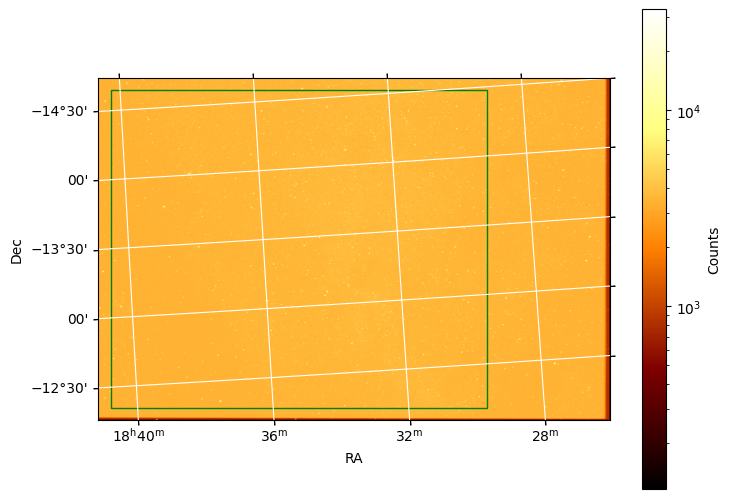

2558160


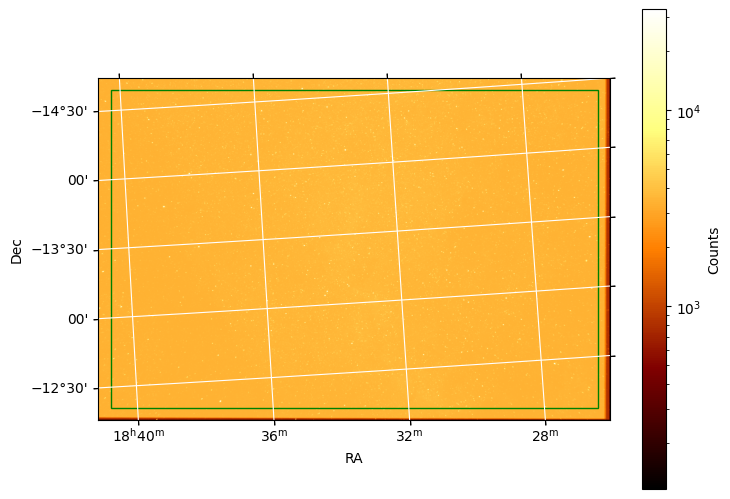

In [4]:
nb = Image('../data/rim_Ha_wcs.fits')
# nb.cropCoords(dec_start='-13d', ra_start='18h28m')
nb.cropPixels(50, -500, 50, -50)
nb.plot(showCropped=True, croppedBorder='green', original=True)
nb.cropPixels(50, -50, 50, -50)
nb.plot(showCropped=True, croppedBorder='green')


### Testing plotting labelled stars

Previous saved catalog file found.
1781760


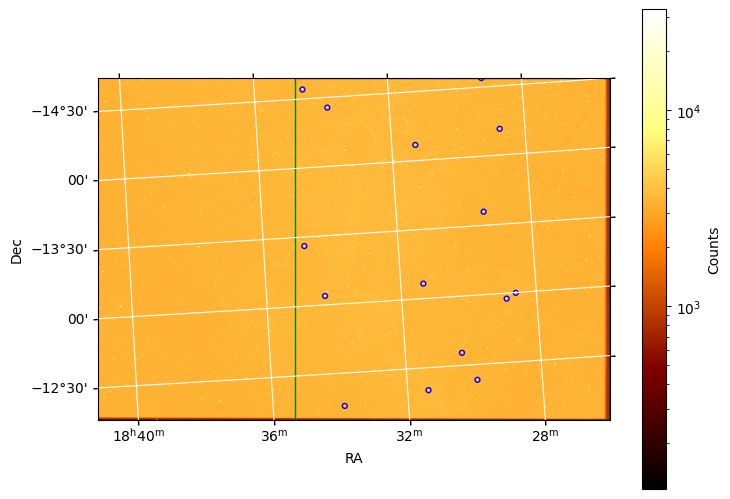

In [5]:
nb.cropPixels(x_start = 800)

filter = StarsFilter(data_directory_path="../data")
filter.setStarsInRegion(nb)
filter.setVisibleStars(nb)
nb.setLabeledStars(filter)

nb.plot(showCropped=True, croppedBorder='green', showLabeledStars=True)

### Testing Zoom Function

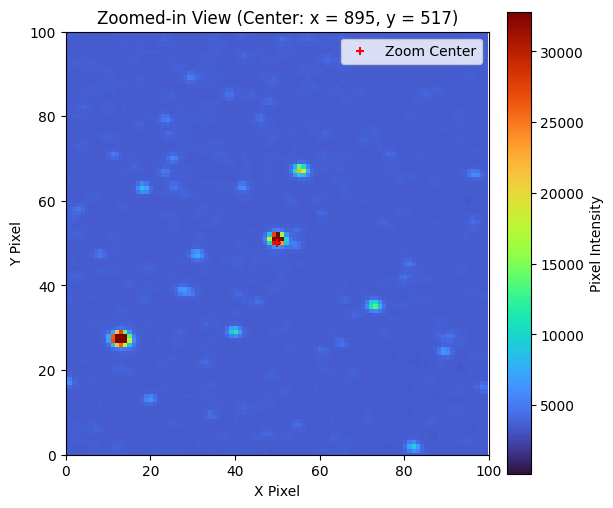

In [6]:
#Zooms into the point (200, 200) in x-y pixels
nb.zoomToPoint(x = 895, y = 517, custom_cmap = 'turbo')

### Testing getBounds

In [9]:
bl, br, tl, tr =nb.getBounds()
print(bl.to_string(style = 'hmsdms'))

18h35m22.29388068s -12d10m56.69916084s


### Testing Subtractor (VERY IMPORTANT!!!)

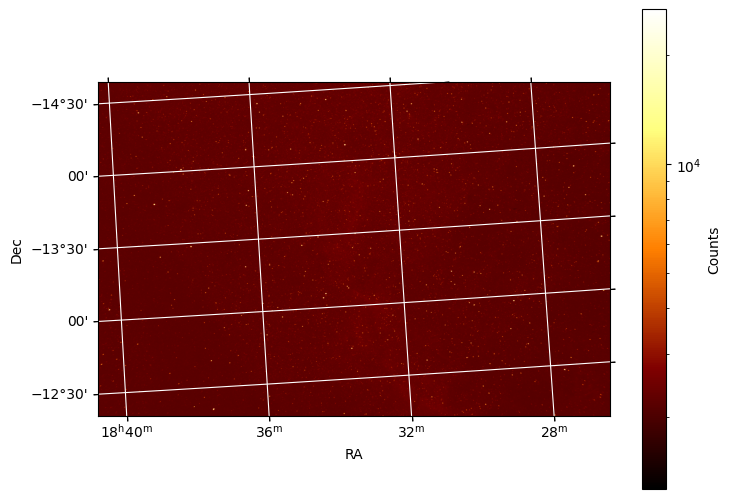

In [13]:
nb.cropPixels(50, -50, 50, -50)
bb.cropPixels(50, -50, 50, -50)

subtracted_image = Image.subtract(nb, bb, mu = 0.5)
subtracted_image.plot()

### Test Histogram plotting

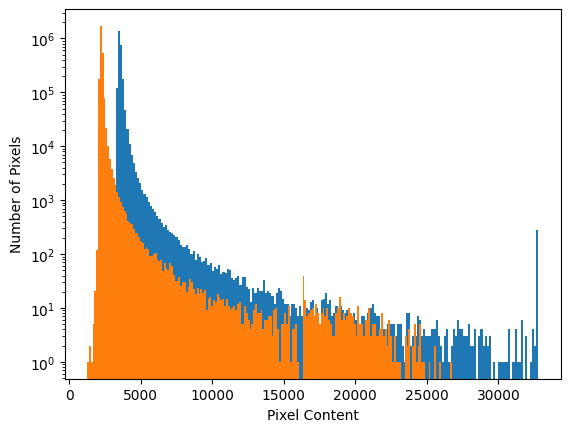

In [16]:
nb.plotHist()
subtracted_image.plotHist()